In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import math

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final_STATS201_Haoyang/main/data/EAFE%20Standard.csv', index_col=0, parse_dates=[0])
de = pd.read_csv('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final_STATS201_Haoyang/main/data/MSCI%20China%20ESG%20Leaders%20Index%20Standard.csv', index_col=0, parse_dates=[0])

In [25]:
df.head()

,EAFE Standard (Large+Mid Cap),Return Rate,Unnamed: 3,Unnamed: 4,Unnamed: 5
Date,,,,,
2018-12-11,"5,314.294",0.004362,NaN,NaN,NaN
2018-12-12,"5,421.503",0.020174,NaN,NaN,NaN
2018-12-13,"5,416.665",-0.000892,NaN,NaN,NaN
2018-12-14,"5,353.376",-0.011684,NaN,NaN,NaN
2018-12-17,"5,339.569",-0.002579,NaN,NaN,NaN


In [26]:
de.head

<bound method NDFrame.head of            MSCI China ESG Leaders Index Standard (Large+Mid Cap)  Return Rate
Date                                                                         
2018-12-11                                          1,357.273        0.005908
2018-12-12                                          1,372.668        0.011343
2018-12-13                                          1,384.649        0.008728
2018-12-14                                          1,354.181       -0.022004
2018-12-17                                          1,338.178       -0.011817
...                                                       ...             ...
2022-12-05                                          1,265.738        0.056258
2022-12-06                                          1,253.122       -0.009967
2022-12-07                                          1,210.445       -0.034057
2022-12-08                                          1,265.040        0.045103
2022-12-09                        

In [65]:
stock_week = (df['Return Rate']-de['Return Rate']).resample("M").mean()

In [66]:
stock_week

Date
2018-12-31    1.463007e-03
2019-01-31   -2.807932e-03
2019-02-28    8.121800e-07
2019-03-31   -1.260306e-03
2019-04-30   -3.113747e-04
2019-05-31    4.779968e-03
2019-06-30   -1.379082e-03
2019-07-31   -9.846605e-04
2019-08-31    7.619587e-04
2019-09-30    1.658092e-03
2019-10-31   -1.398777e-04
2019-11-30   -1.647895e-03
2019-12-31   -2.399940e-03
2020-01-31    7.194232e-04
2020-02-29   -5.666929e-03
2020-03-31   -4.058854e-03
2020-04-30   -3.323286e-05
2020-05-31    1.851776e-03
2020-06-30   -2.939456e-03
2020-07-31   -3.377223e-03
2020-08-31   -1.001460e-03
2020-09-30   -5.573057e-04
2020-10-31   -5.668551e-03
2020-11-30    7.802075e-03
2020-12-31    2.520422e-03
2021-01-31   -6.146535e-03
2021-02-28    2.871798e-03
2021-03-31    3.239179e-03
2021-04-30    4.280298e-04
2021-05-31    1.770523e-03
2021-06-30   -1.279516e-03
2021-07-31    6.961446e-03
2021-08-31    1.337121e-03
2021-09-30    1.704540e-03
2021-10-31   -1.490214e-03
2021-11-30    1.764776e-03
2021-12-31    3.803095e

In [67]:
stock_train = stock_week['2018-12-31':'2021-12-31'].dropna()

In [68]:
stock_train 

Date
2018-12-31    1.463007e-03
2019-01-31   -2.807932e-03
2019-02-28    8.121800e-07
2019-03-31   -1.260306e-03
2019-04-30   -3.113747e-04
2019-05-31    4.779968e-03
2019-06-30   -1.379082e-03
2019-07-31   -9.846605e-04
2019-08-31    7.619587e-04
2019-09-30    1.658092e-03
2019-10-31   -1.398777e-04
2019-11-30   -1.647895e-03
2019-12-31   -2.399940e-03
2020-01-31    7.194232e-04
2020-02-29   -5.666929e-03
2020-03-31   -4.058854e-03
2020-04-30   -3.323286e-05
2020-05-31    1.851776e-03
2020-06-30   -2.939456e-03
2020-07-31   -3.377223e-03
2020-08-31   -1.001460e-03
2020-09-30   -5.573057e-04
2020-10-31   -5.668551e-03
2020-11-30    7.802075e-03
2020-12-31    2.520422e-03
2021-01-31   -6.146535e-03
2021-02-28    2.871798e-03
2021-03-31    3.239179e-03
2021-04-30    4.280298e-04
2021-05-31    1.770523e-03
2021-06-30   -1.279516e-03
2021-07-31    6.961446e-03
2021-08-31    1.337121e-03
2021-09-30    1.704540e-03
2021-10-31   -1.490214e-03
2021-11-30    1.764776e-03
2021-12-31    3.803095e

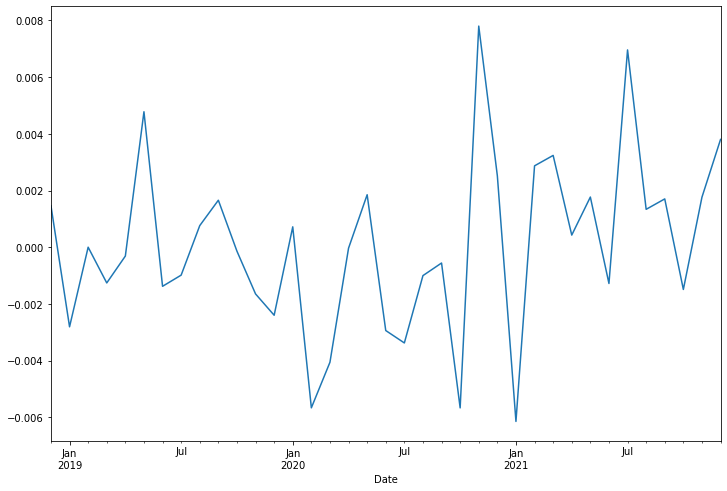

In [69]:
stock_train.plot(figsize=(12,8))

In [70]:
model = ARIMA(stock_train, order=(2, 0, 2))

In [71]:
result = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Return Rate   No. Observations:                   37
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 161.356
Date:                Tue, 13 Dec 2022   AIC                           -310.712
Time:                        07:55:29   BIC                           -301.046
Sample:                    12-31-2018   HQIC                          -307.304
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.957e-05      0.000      0.067      0.947      -0.001       0.001
ar.L1          0.2914      1.815      0.161      0.872      -3.267       3.849
ar.L2         -0.3056      1.222     -0.250      0.803      -2.701       2.090
ma.L1         -0.4040      1.867     -0.216      0.829      -4.063       3.255
ma.L2          0.1677      1.443      0.116      0.907      -2.660       2.995
sigma2      9.504e-06   2.69e-06      3.532      0.000    4.23e-06    1.48e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.61   Prob(JB):                         0.93
Heteroskedasticity (H):               3.35   Skew:                             0.15
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
pred = result.predict(40, 47, dynamic = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [90]:
pred

2022-04-30    0.000240
2022-05-31    0.000098
2022-06-30   -0.000015
2022-07-31   -0.000004
2022-08-31    0.000033
2022-09-30    0.000041
2022-10-31    0.000032
2022-11-30    0.000027
Freq: M, Name: predicted_mean, dtype: float64

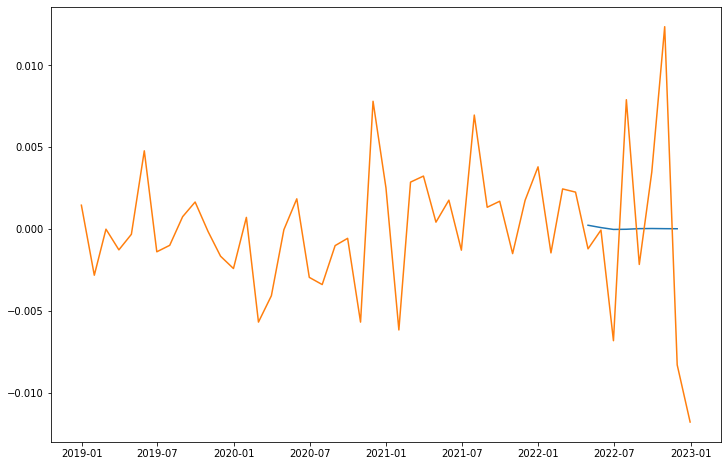

In [91]:
plt.figure(figsize=(12,8))
plt.plot(pred)
plt.plot(stock_week)
plt.show()